In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

from utils import get_data

# sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
X = pd.read_csv('data/CC GENERAL.csv')
X.drop(columns=['CUST_ID'], inplace=True)
X.ffill(inplace=True)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Split data into train and test sets.

TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, _, _ = train_test_split(X, X, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [4]:
num_cols = X.columns

# Train the Expectation Maximisation

In [6]:
RANDOM_STATE = 42
N_JOBS = -1
VERBOSE = 4

scaler = StandardScaler()

# clus = GaussianMixture(n_init=100, init_params='k-means++', random_state=RANDOM_STATE, covariance_type='full')
clus = GaussianMixture(random_state=RANDOM_STATE)
clus_pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('model', clus)
])


In [7]:
# clus_pipeline.set_params(model__n_components=3)
# clus_pipeline.fit(X_train)
# clus_pipeline.named_steps['model'].means_
# clus_pipeline.named_steps['model'].score(X_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', GaussianMixture(n_components=3, random_state=42))])

In [8]:
results = {}
for n_components in range(2, 20):
    print(f"---------- n_components: {n_components} ----------")
    clus_pipeline.set_params(model__n_components=n_components)
    clus_pipeline.fit(X_train)
    
    results[n_components] = {'aic': clus_pipeline.named_steps['model'].aic(X_train.values),
                             'bic': clus_pipeline.named_steps['model'].bic(X_train.values),
                             'score': clus_pipeline.named_steps['model'].score(X_train.values),
                           }

---------- n_components: 2 ----------
---------- n_components: 3 ----------
---------- n_components: 4 ----------
---------- n_components: 5 ----------
---------- n_components: 6 ----------
---------- n_components: 7 ----------
---------- n_components: 8 ----------
---------- n_components: 9 ----------
---------- n_components: 10 ----------
---------- n_components: 11 ----------
---------- n_components: 12 ----------
---------- n_components: 13 ----------
---------- n_components: 14 ----------
---------- n_components: 15 ----------
---------- n_components: 16 ----------
---------- n_components: 17 ----------
---------- n_components: 18 ----------
---------- n_components: 19 ----------


In [9]:
print(results)

{2: {'aic': 141698677528003.3, 'bic': 141698677530348.12, 'score': -9895159045.204002}, 3: {'aic': 495562130870121.06, 'bic': 495562130873641.7, 'score': -34606294055.104546}, 4: {'aic': 408345216504158.5, 'bic': 408345216508855.0, 'score': -28515727409.412884}, 5: {'aic': 1428419085006405.0, 'bic': 1428419085012277.2, 'score': -99749936103.67996}, 6: {'aic': 288689142591285.75, 'bic': 288689142598333.94, 'score': -20159856326.06395}, 7: {'aic': 274303943069045.84, 'bic': 274303943077269.84, 'score': -19155303286.777504}, 8: {'aic': 349768757513735.25, 'bic': 349768757523135.1, 'score': -24425192563.617405}, 9: {'aic': 97610147197196.78, 'bic': 97610147207772.48, 'score': -6816351061.041954}, 10: {'aic': 93351693849289.22, 'bic': 93351693861040.75, 'score': -6518973033.929554}, 11: {'aic': 78869812014065.94, 'bic': 78869812026993.31, 'score': -5507668436.473878}, 12: {'aic': 91027728939603.06, 'bic': 91027728953706.28, 'score': -6356684981.529404}, 13: {'aic': 596467428030484.6, 'bic':

<Axes: title={'center': 'BIC'}, xlabel='n_components'>

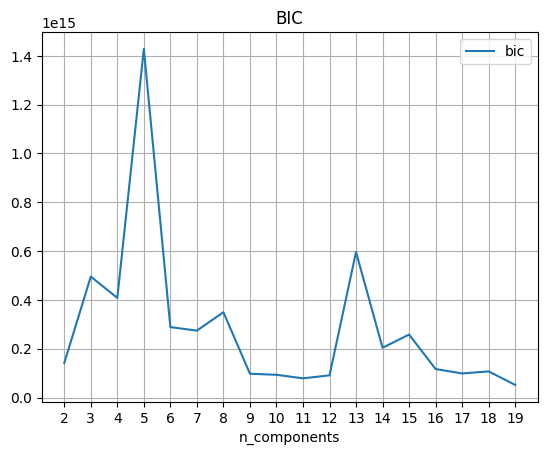

In [11]:
results_df = pd.DataFrame.from_dict(results, orient='index').reset_index()
results_df.columns = ['n_components', 'aic', 'bic', 'score']
results_df.plot(x='n_components', y='bic',title='BIC', xticks=results_df['n_components'], grid=True)

<Axes: title={'center': 'score'}, xlabel='n_components'>

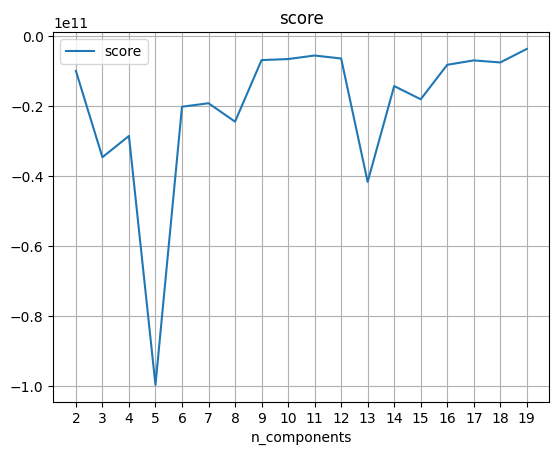

In [12]:
results_df.plot(x='n_components', y='score',title='score', xticks=results_df['n_components'], grid=True)